## bagreader : Extract each topics to csv

In [2]:
import bagpy
from bagpy import bagreader
import pandas as pd

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [3]:
f = bagreader("/mnt/hdd/p3_drive1.bag")

[INFO]  Data folder /mnt/hdd/p3_drive1 already exists. Not creating.


In [4]:
f.topic_table

,Topics,Types,Message Count,Frequency
0,/GPS,nav_msgs/Odometry,91,0.999850
1,/GPS_throttled,nav_msgs/Odometry,91,0.999947
2,/amcl/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
3,/amcl/parameter_updates,dynamic_reconfigure/Config,1,NaN
4,/amcl_pose,geometry_msgs/PoseWithCovarianceStamped,266,4.977428
5,/cmd_vel,geometry_msgs/Twist,41,4.991528
6,/diagnostics,diagnostic_msgs/DiagnosticArray,4015,40.306980
7,/imu/data,sensor_msgs/Imu,3654,40.008623
8,/imu_data_str,std_msgs/String,3661,40.038604
9,/keyboard_node/keydown,keyboard/Key,42,4.992084


### Some internal functions to extract common topics

In [5]:
vel_msgs = f.vel_data()


In [6]:
vel_msgs

['/mnt/hdd/p3_drive1/cmd_vel.csv']

In [26]:
vel_df = pd.read_csv(vel_msgs[0])
vel_df.head()

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.607950e+09,0.01,0.0,0.0,0.0,0.0,0.0
1,1.607950e+09,0.02,0.0,0.0,0.0,0.0,0.0
2,1.607950e+09,0.03,0.0,0.0,0.0,0.0,0.0
3,1.607950e+09,0.04,0.0,0.0,0.0,0.0,0.0
4,1.607950e+09,0.05,0.0,0.0,0.0,0.0,0.0


## Plot in time, Animation version

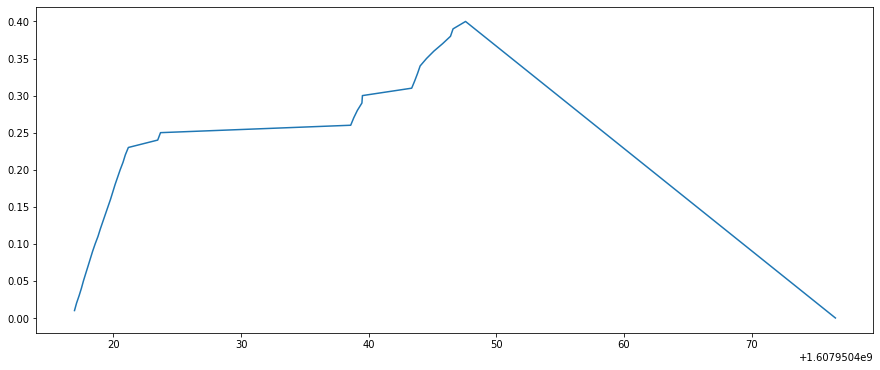

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,6]
plt.plot(vel_df["Time"], vel_df["linear.x"])

In [25]:
gps_msgs = f.message_by_topic('/GPS')
gps_df = pd.read_csv(gps_msgs)
gps_df
len(gps_df)

91

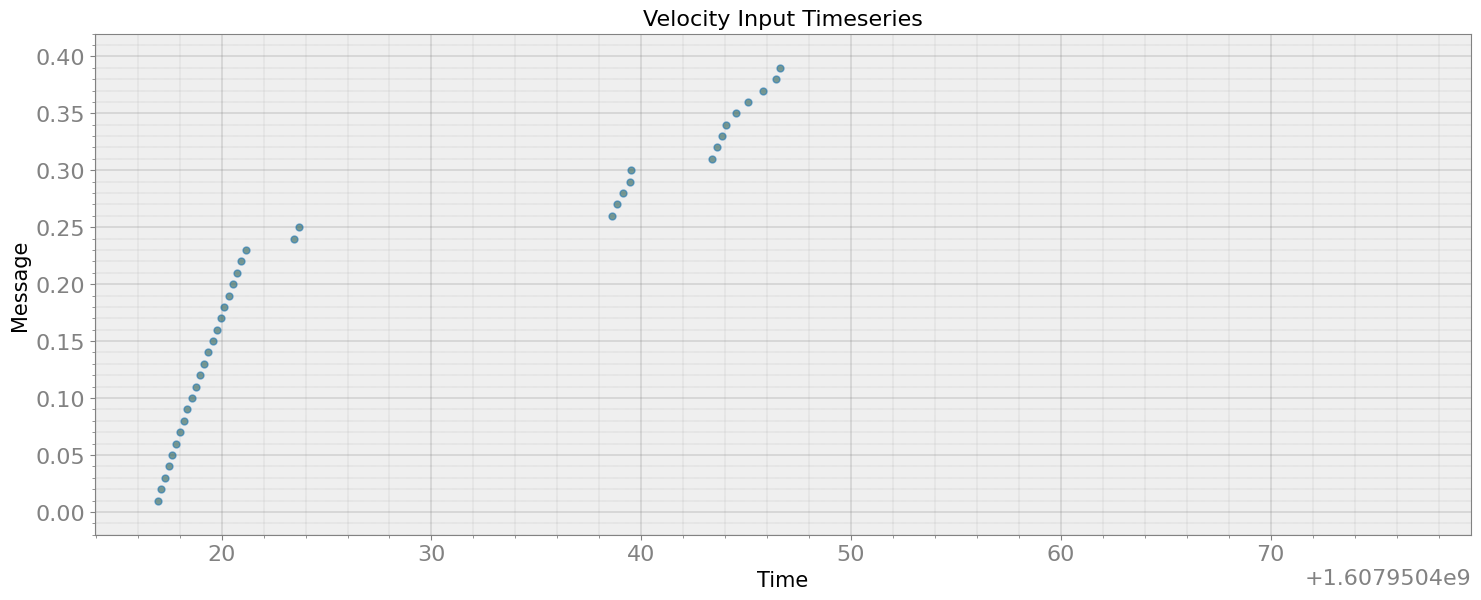

In [11]:
bagpy.animate_timeseries(vel_df['Time'],vel_df['linear.x'],title='Velocity Input Timeseries')

## Access some attibutes of bagreader object

In [12]:
f.bagfile

'/mnt/hdd/p3_drive1.bag'

In [13]:
f.datafolder

'/mnt/hdd/p3_drive1'

In [14]:
f.dir

'/mnt/hdd'

In [15]:
f.start_time

1607950408.964728

In [16]:
f.filename

'/p3_drive1.bag'

In [17]:
f.frequency

[0.9998498188529307,
 0.9999468354834764,
 None,
 None,
 4.977427566114648,
 4.991528464466499,
 40.30697969421194,
 40.00862307435494,
 40.03860380978746,
 4.992083942817764,
 4.99756812178217,
 None,
 None,
 0.9999555369120516,
 0.9999337240278053,
 0.9998016750827625,
 0.9997958361783774,
 1.0001169579906213,
 0.9997385232067209,
 10.005543919579768,
 10.007191103455023,
 4.976937352565654,
 99.01801270096084,
 19.176284212716055,
 23.98718945875463,
 5380.762026940346,
 14.998512415608193,
 None,
 None,
 40.009004712211684,
 9.906525456555217,
 9.915612293144209,
 9.90876049067725,
 29.47777379521671,
 None,
 None,
 None,
 None,
 None,
 None]

## Decoding specialized messages

In [28]:
# point_cloud = f.laser_data()
# point_cloud

# Only works for 2D LaserScan message
# Error with Velodyne/Scan

IndexError: list assignment index out of range

TypeError: 'bagreader' object is not subscriptable